# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Loading data 

In [2]:
news = pd.read_csv('fake-news/train.csv')
news

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [3]:
fake_news = pd.read_csv('data/Fake.csv')
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
true_news = pd.read_csv('data/True.csv')
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
fake = fake_news['title']
true = true_news['title']

In [6]:
news = news.drop('id',axis = 1)

In [7]:
news

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [9]:
news = news.dropna()

In [10]:
news.shape

(18285, 4)

In [11]:
news.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
X = news.drop('label',axis = 1)
y = news['label']

In [13]:
X.head(5)

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [14]:
y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [15]:
messages = news.copy()

In [16]:
messages.reset_index(inplace = True)

In [17]:
messages.head(10)

,index,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
messages = messages.drop('index',axis = 1)

In [19]:
messages.title.iloc[3]

'15 Civilians Killed In Single US Airstrike Have Been Identified'

In [20]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
def lemmatization(text):
    lemma = WordNetLemmatizer()
    corpus = []
    #for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',text)
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    return corpus    

In [21]:
def filtering_keywords(text):
    keywords = []
    for i in range(len(text)):
        keywords.append(lemmatization(text[i]))
    keywords = np.array(keywords)
    keywords.shape = (len(text),)
    return keywords

# Term-frequency Inverse-document-frequency (TF-IDF)

![tf_idf](https://miro.medium.com/max/532/0*bHkPdhgfnyTs4un_)

In [22]:
def tfidf(text):
    cv = TfidfVectorizer(max_features = 5000,ngram_range = (1,3))
    features = cv.fit_transform(filtering_keywords(text)).toarray()
    return features,cv

In [23]:
features,cv = tfidf(messages['title'])

In [24]:
messages['title'].shape

(18285,)

In [25]:
cv.get_feature_names()

['abandoned',
 'abc',
 'abe',
 'abedin',
 'able',
 'abortion',
 'about',
 'about election',
 'about election violence',
 'about emf',
 'about emf damage',
 'about hillary',
 'about the',
 'about to',
 'about trump',
 'above',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'accidentally',
 'according',
 'account',
 'accusations',
 'accused',
 'accuses',
 'acknowledge',
 'acquitted',
 'across',
 'act',
 'act the',
 'act the new',
 'acting',
 'action',
 'actions',
 'active',
 'activist',
 'activists',
 'actor',
 'acts',
 'actually',
 'ad',
 'adams',
 'add',
 'address',
 'adds',
 'adhd',
 'admin',
 'administration',
 'admiral',
 'admit',
 'admits',
 'admitted',
 'ads',
 'adults',
 'advance',
 'advice',
 'adviser',
 'advisor',
 'advocates',
 'affordable',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'after',
 'after election',
 'after he',
 'after trump',
 'after years',
 'ag',
 'again',
 'again breitbart',


In [26]:
X = features

In [27]:
X.shape

(18285, 5000)

In [28]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.82,random_state = 0)

In [30]:
X_train.shape

(14993, 5000)

In [31]:
y_train.shape

(14993,)

In [32]:
df = pd.DataFrame(X_train,columns = cv.get_feature_names())

In [33]:
df

,abandoned,abc,abe,abedin,able,abortion,about,about election,about election violence,about emf,...,youtube,zealand,zero,zika,zika virus,zionist,zone,zones,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.341997,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Voting classifier Model

### Hard Voting

![voting_classifier_hard](https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-07-at-4.37.36-PM-2.png)

### Soft Voting

![voting_classifier_soft](https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-07-at-4.40.58-PM-1.png)

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = LogisticRegression()
classifiers = [clf1,clf2,clf3]
labels = ['RandomForest','NaiveBayes','LogisticRegression']

In [35]:
voting_classifier_hard = VotingClassifier(estimators = [(labels[0],clf1),(labels[1],clf2),(labels[2],clf3)],voting = 'hard')

In [36]:
voting_classifier_soft = VotingClassifier(estimators = [(labels[0],clf1),(labels[1],clf2),(labels[2],clf3)],voting = 'soft')

In [37]:
classifiers = [clf1,clf2,clf3,voting_classifier_hard,voting_classifier_soft]
labels = ['RandomForest','NaiveBayes','LogisticRegression','VotingClassifier_Hard','VotingClassifier_Soft']

for clf,label in zip(classifiers,labels):
    scores = cross_val_score(clf,X_train,y_train,cv = 5,scoring = 'accuracy')
    print(" %s - Accuracy : %0.2f" % (label,scores.mean()))

 RandomForest - Accuracy : 0.94
 NaiveBayes - Accuracy : 0.89
 LogisticRegression - Accuracy : 0.93
 VotingClassifier_Hard - Accuracy : 0.94
 VotingClassifier_Soft - Accuracy : 0.94


In [38]:
voting_classifier_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('RandomForest', RandomForestClassifier()),
                             ('NaiveBayes', MultinomialNB()),
                             ('LogisticRegression', LogisticRegression())])

# Prediction

In [39]:
y_pred = voting_classifier_hard.predict(X_test)

In [40]:
comparison = {'Actual' : y_test,'Predicted' : y_pred}
df = pd.DataFrame(comparison)
df

,Actual,Predicted
15130,0,1
5504,0,1
6238,1,1
13189,0,0
8515,0,0
...,...,...
3545,1,1
6564,0,0
18928,1,1
7151,0,0


In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE : %0.2f" % (mean_absolute_error(y_test,y_pred)))
print("MSE : %0.2f" % (mean_squared_error(y_test,y_pred)))

MAE : 0.06
MSE : 0.06


# Confusion Matrix

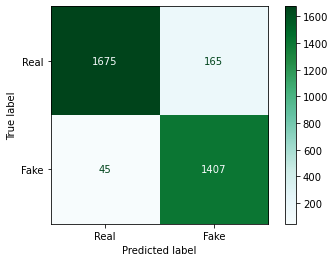

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#confusion_matrix(y_test,y_pred)
plot_confusion_matrix(voting_classifier_hard,X_test,y_test,display_labels = ['Real','Fake'],cmap = 'BuGn')
plt.show()

In [43]:
voting_classifier_hard.score(X_test,y_test)

0.9362089914945322

In [44]:
import pickle
save_lemma = open('lemmatization.pickle','wb')
pickle.dump(lemmatization,save_lemma)
save_lemma.close()

In [49]:
save_tfidf = open('tfidf.pickle','wb')
pickle.dump(tfidf,save_tfidf)
save_tfidf.close()

In [50]:
save_classifier = open('voting_classifier.pickle','wb')
pickle.dump(voting_classifier_hard,save_classifier)
save_classifier.close()

# Validation

In [51]:
true[2300]

'Trump administration goes on attack against leakers, journalists'

In [52]:
voting_classifier_hard.predict(cv.transform([true[2300]]))

array([0])

__________________________________________________________________________________________________________________

In [53]:
fake[0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [54]:
voting_classifier_hard.predict(cv.transform([fake[0]]))

array([0])

__________________________________________________________________________________________________________________

In [55]:
true[1200]

'FCC chairman rejects Trump suggestion on broadcast licenses'

In [56]:
voting_classifier_hard.predict(cv.transform([true[1200]]))

array([1])

__________________________________________________________________________________________________________________

In [57]:
true[15]

'Virginia officials postpone lottery drawing to decide tied statehouse election'

In [58]:
voting_classifier_hard.predict(cv.transform([true[15]]))

array([1])

__________________________________________________________________________________________________________________

In [59]:
fake[25]

' Despicable Trump Suggests Female Senator Would ‘Do Anything’ With Him For Campaign Money (TWEET)'

In [60]:
voting_classifier_hard.predict(cv.transform([fake[25]]))

array([1])

This news belongs to a fake category but the model is still predicting it as true.